In [1]:
# import from

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import folium
import warnings
warnings.filterwarnings("ignore")

# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")
    

### Decision Tree
- 데이터 분류 및 회귀에 사용되는 지도학습 알고리즘     
- 장점 : 대소를 구분하는 것이므로 표준화를 할 필요가 없다
(표준화를 할 필요가 없는 유일한 녀석)

### 문제정의
서울 지역(구)의 경도와 위도 정보를 사용하여 임의의 입력된 지역(동)을 강남, 강북, 강서, 강동로 분류

In [2]:
train_df = pd.read_csv('../Data/seoul_district.csv')
train_df.head()

,district,longitude,latitude,label
0,강서구,126.849500,37.551000,강서
1,양천구,126.855396,37.524240,강서
2,구로구,126.887400,37.495400,강서
3,금천구,126.902000,37.451900,강서
4,마포구,126.908728,37.560229,강서


In [4]:
test_df = pd.read_csv('../Data/seoul_dong.csv')
test_df.head()

,dong,longitude,latitude,label
0,개봉동,126.854547,37.489853,강서
1,고척동,126.859245,37.501394,강서
2,화곡동,126.847951,37.537759,강서
3,방화동,126.815719,37.575817,강서
4,상암동,126.891620,37.577039,강서


In [6]:
# Target 의 갯수는 균일한게 좋으므로 label 갯수 확인
train_df.label.value_counts()
#data가 그냥 많은녀석이 아니네

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [7]:
test_df.label.value_counts()

강서    5
강남    5
강북    5
강동    5
Name: label, dtype: int64

In [9]:
train_df.describe()

,longitude,latitude
count,20.000000,20.000000
mean,126.999772,37.547909
std,0.089387,0.055086
min,126.849500,37.451900
25%,126.913481,37.510177
50%,127.028844,37.552597
75%,127.056458,37.573690
max,127.151405,37.668800


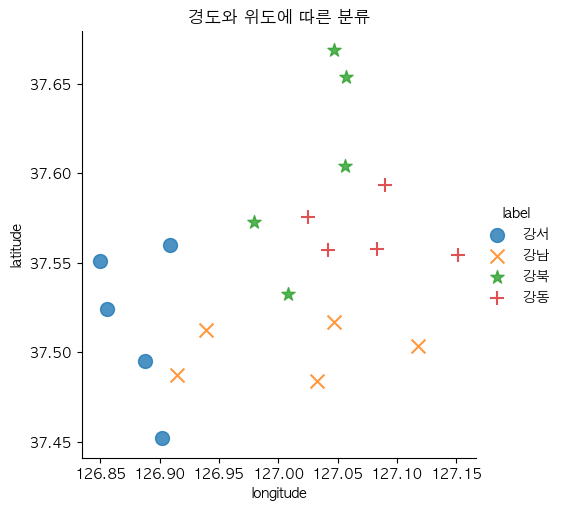

In [15]:
sns.lmplot(
    x = 'longitude',
    y = 'latitude',
    data = train_df,
    fit_reg = False,
    markers = ['o','x','*','+'],
    scatter_kws = {'s':100},
    hue='label'
)

plt.title('경도와 위도에 따른 분류')
plt.show()

- 데이터 다듬기

In [16]:
train_df.drop(columns='district',axis=1,inplace=True)
test_df.drop(columns='dong',axis=1,inplace=True)

In [23]:
print(train_df.head(2))
print('-'*35)
print(test_df.head(2))

    longitude  latitude label
0  126.849500  37.55100    강서
1  126.855396  37.52424    강서
-----------------------------------
    longitude   latitude label
0  126.854547  37.489853    강서
1  126.859245  37.501394    강서


In [29]:

x_train = train_df.iloc[:,:2]
x_test = test_df.iloc[:,:2]

y_train = train_df.iloc[:,2]
y_test = test_df.iloc[:,2]

### Decision Tree로 학습시키기

In [31]:
from sklearn.tree import DecisionTreeClassifier
tr_clf = DecisionTreeClassifier(random_state=35)

In [32]:
tr_clf.fit(x_train, y_train) # 위도,경도 숫자의 크기만으로 공부한것임 
tr_clf.score(x_test,y_test)

0.95

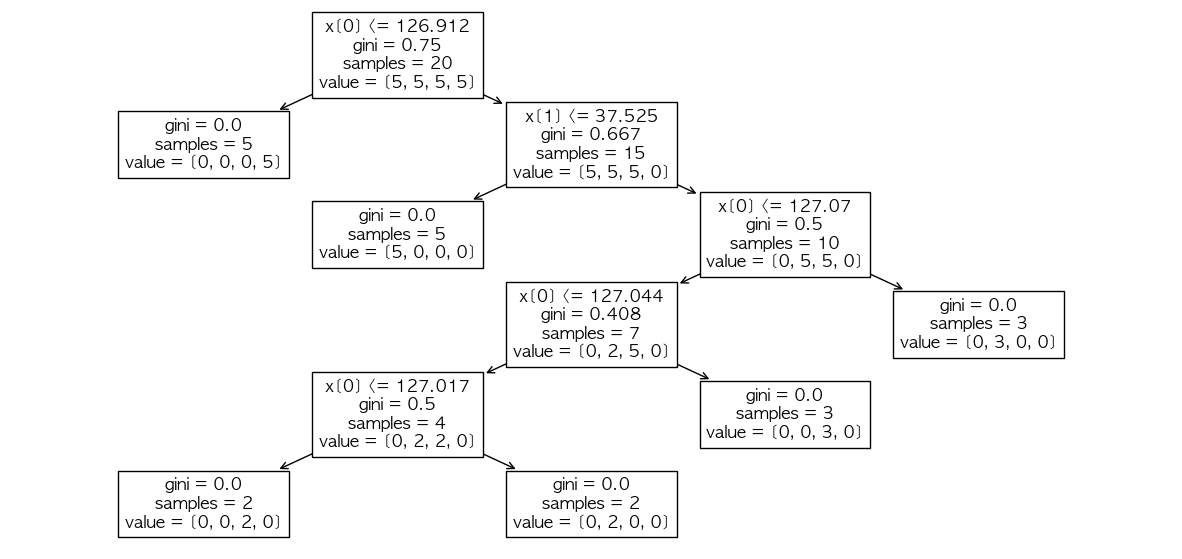

In [35]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(tr_clf)
plt.show()

gini : 불순도
0이 되면 더이상 갈라지지 않음. 순도가 높다 = 정해졌다 ?
나누는 기준
지니
샘플
벨류 